<a href="https://colab.research.google.com/github/wxj630/Data-Structures-and-Algorithms/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!git clone https://github.com/FakeNewsDetection/FakeBuster


Cloning into 'FakeBuster'...
remote: Enumerating objects: 158, done.
remote: Total 158 (delta 0), reused 0 (delta 0), pack-reused 158
Receiving objects: 100% (158/158), 50.53 MiB | 10.58 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [2]:
!ls

drive  sample_data


In [3]:
cd drive/My Drive/FakeBuster

/content/drive/My Drive/FakeBuster


In [4]:
!ls

 datasets		    navie_bayes.png	  xte.npy
'Fake News Detection.pdf'   neural-net-keras.py   xte_shuffled.npy
 getEmbeddings.py	    neural-net-tf.py	  xtr.npy
 images			    Presentation.pptx	  xtr_shuffled.npy
 LSTM.py		   'Project Report.pdf'   yte.npy
 model1.png		    __pycache__		  yte_shuffled.npy
 model2.png		    README.md		  ytr.npy
 naive-bayes.py		    svm.py		  ytr_shuffled.npy


In [5]:
!pip install scikit-plot

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
!python naive-bayes.py

Accuracy = 71.01%
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)
<Figure size 640x480 with 2 Axes>


# 文本可视化


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train=pd.read_csv("datasets/train.csv")

In [9]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [11]:
train['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [12]:
test=pd.read_csv("datasets/test.csv")
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
id        5200 non-null int64
title     5078 non-null object
author    4697 non-null object
text      5193 non-null object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


# Naive Bayes

In [0]:
from getEmbeddings import getEmbeddings
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import os


def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()
    plt.savefig("navie_bayes.png")

# Read the data
if not os.path.isfile('./xtr.npy') or \
    not os.path.isfile('./xte.npy') or \
    not os.path.isfile('./ytr.npy') or \
    not os.path.isfile('./yte.npy'):
    xtr,xte,ytr,yte = getEmbeddings("datasets/train.csv")
    np.save('./xtr', xtr)
    np.save('./xte', xte)
    np.save('./ytr', ytr)
    np.save('./yte', yte)

xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')

# Use the built-in Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(xtr,ytr)
y_pred = gnb.predict(xte)
m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%")   # 72.94%


Accuracy = 71.01%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


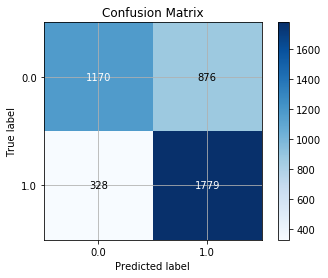

<Figure size 432x288 with 0 Axes>

In [0]:
# Draw the confusion matrix
plot_cmat(yte, y_pred)

# SVM


In [0]:
from getEmbeddings import getEmbeddings
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import os


def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()

# Read the data
if not os.path.isfile('./xtr.npy') or \
    not os.path.isfile('./xte.npy') or \
    not os.path.isfile('./ytr.npy') or \
    not os.path.isfile('./yte.npy'):
    xtr,xte,ytr,yte = getEmbeddings("datasets/train.csv")
    np.save('./xtr', xtr)
    np.save('./xte', xte)
    np.save('./ytr', ytr)
    np.save('./yte', yte)

xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')

# Use the built-in SVM for classification
clf = SVC()
clf.fit(xtr, ytr)
y_pred = clf.predict(xte)
m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%")   # 88.42%



Accuracy = 91.28%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


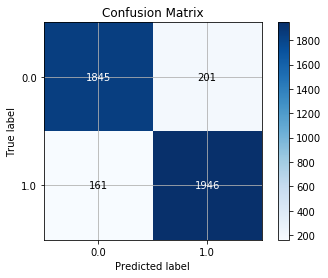

In [0]:
# Draw the confusion matrix
plot_cmat(yte, y_pred)

# Neural Network

In [0]:
from getEmbeddings import getEmbeddings
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scikitplot.plotters as skplt
import os


def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte, ypred)
    plt.show()

# Read the data
if not os.path.isfile('./xtr.npy') or \
    not os.path.isfile('./xte.npy') or \
    not os.path.isfile('./ytr.npy') or \
    not os.path.isfile('./yte.npy'):
    xtr,xte,ytr,yte = getEmbeddings("datasets/train.csv")
    np.save('./xtr', xtr)
    np.save('./xte', xte)
    np.save('./ytr', ytr)
    np.save('./yte', yte)

xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')


def baseline_model():
    '''Neural network with 3 hidden layers'''
    model = Sequential()
    model.add(Dense(256, input_dim=300, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(80, activation='relu', kernel_initializer='normal'))
    model.add(Dense(2, activation="softmax", kernel_initializer='normal'))

    # gradient descent
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    # configure the learning process of the model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Train the model
model = baseline_model()
model.summary()
x_train, x_test, y_train, y_test = train_test_split(xtr, ytr, test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y = np_utils.to_categorical((label_encoder.transform(y_train)))
label_encoder.fit(y_test)
encoded_y_test = np_utils.to_categorical((label_encoder.transform(y_test)))
estimator = model.fit(x_train, encoded_y, epochs=20, batch_size=64)
print("Model Trained!")
score = model.evaluate(x_test, encoded_y_test)
print("")
print("Accuracy = " + format(score[1]*100, '.2f') + "%")   # 92.69%

probabs = model.predict_proba(x_test)
y_pred = np.argmax(probabs, axis=1)
 

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               77056     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 80)                20560     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 162       

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


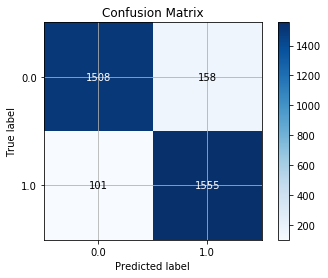

In [0]:
# Draw the confusion matrix
plot_cmat(y_test, y_pred)

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               77056     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 80)                20560     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 162       
Total params: 163,570
Trainable params: 163,570
Non-trainable params: 0
________________________________________________

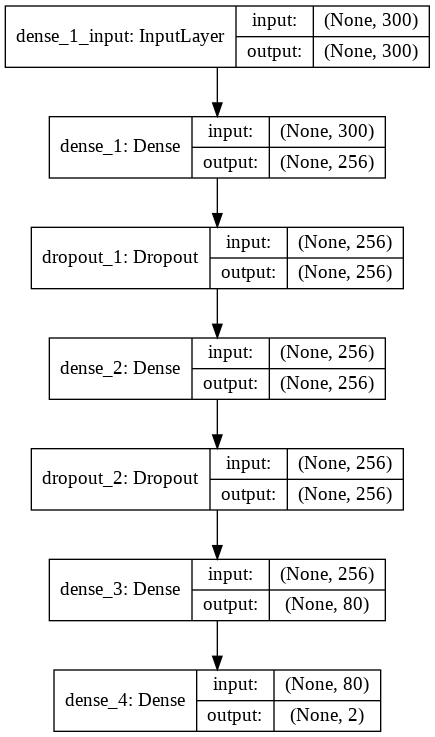

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1.png',show_shapes=True)

# LSTM

In [0]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from collections import Counter
import os
import getEmbeddings
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt


top_words = 5000
epoch_num = 5
batch_size = 64

def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte, ypred)
    plt.show()

# Read the text data
if not os.path.isfile('./xtr_shuffled.npy') or \
    not os.path.isfile('./xte_shuffled.npy') or \
    not os.path.isfile('./ytr_shuffled.npy') or \
    not os.path.isfile('./yte_shuffled.npy'):
    getEmbeddings.clean_data()


xtr = np.load('./xtr_shuffled.npy',allow_pickle=True)
xte = np.load('./xte_shuffled.npy',allow_pickle=True)
y_train = np.load('./ytr_shuffled.npy',allow_pickle=True)
y_test = np.load('./yte_shuffled.npy',allow_pickle=True)

cnt = Counter()
x_train = []
for x in xtr:
    x_train.append(x.split())
    for word in x_train[-1]:
        cnt[word] += 1  

# Storing most common words
most_common = cnt.most_common(top_words + 1)
word_bank = {}
id_num = 1
for word, freq in most_common:
    word_bank[word] = id_num
    id_num += 1

# Encode the sentences
for news in x_train:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]

y_train = list(y_train)
y_test = list(y_test)

# Delete the short news
i = 0
while i < len(x_train):
    if len(x_train[i]) > 10:
        i += 1
    else:
        del x_train[i]
        del y_train[i]

# Generating test data
x_test = []
for x in xte:
    x_test.append(x.split())

# Encode the sentences
for news in x_test:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]

# Truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

# Convert to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+2, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch_num, batch_size=batch_size)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy= %.2f%%" % (scores[1]*100))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160064    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 213,365
Trainable params: 213,365
Non-trainable params: 0
_________________________________________________________________
None
Train on 16023 samples, validate on 4153 samples
Epoch 1/5
16023/16023 [==============================] - 215s 13ms/step - loss: 0.3095 - acc: 0.8658 - val_loss: 0.1981 - val_acc: 0.9314
Epoch 2/5
16023/16023 [==============================] - 213s 13ms/step - loss: 0.1616 - acc: 0.9493 - val_loss: 0.2484 - val_acc: 0.9066
Epoch 3/5
16023/16023 [========================

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


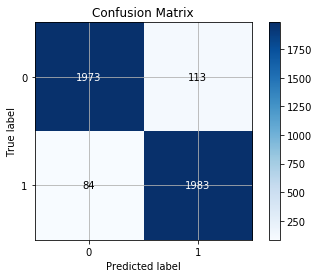

In [0]:
# Draw the confusion matrix
y_pred = model.predict_classes(X_test)
plot_cmat(y_test, y_pred)

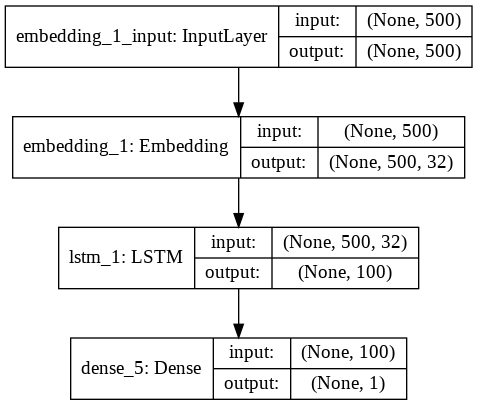

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model2.png',show_shapes=True)

# BERT